In [1]:
from fastai.vision import *

In [2]:
folder = "MESSI.csv"
file = "MESSI.csv"

In [3]:
path = Path('data/players')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [4]:
download_images(file, dest,max_pics=200)

In [5]:
folder = "RONALDO.csv"
file = "RONALDO.csv"

In [6]:
path = Path('data/players')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [7]:
download_images(file, dest,max_pics=200)

In [8]:
folder = "CURRY.csv"
file = "CURRY.csv"

In [9]:
path = Path('data/players')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [10]:
download_images(file, dest,max_pics=200)

In [11]:
folder = "KEVIN.csv"
file = "KEVIN.csv"

In [12]:
path = Path('data/players')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [13]:
download_images(file, dest,max_pics=200)

In [14]:
folder = "PEP.csv"
file = "PEP.csv"

In [15]:
path = Path('data/players')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [16]:
download_images(file, dest,max_pics=200)

In [17]:
folder = "CMG.csv"
file = "CMG.csv"

In [18]:
path = Path('data/players')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [19]:
download_images(file, dest,max_pics=200)

In [20]:
folder = "ABD.csv"
file = "ABD.csv"

In [21]:
path = Path('data/players')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [22]:
download_images(file, dest,max_pics=200)

In [23]:
folder = "K18.csv"
file = "K18.csv"

In [24]:
path = Path('data/players')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [25]:
download_images(file, dest,max_pics=200)

In [26]:
path.ls()

[PosixPath('data/players/ABD.csv'),
 PosixPath('data/players/ABD'),
 PosixPath('data/players/CMG.csv'),
 PosixPath('data/players/CMG'),
 PosixPath('data/players/CURRY.csv'),
 PosixPath('data/players/CURRY'),
 PosixPath('data/players/K18.csv'),
 PosixPath('data/players/K18'),
 PosixPath('data/players/KEVIN.csv'),
 PosixPath('data/players/KEVIN'),
 PosixPath('data/players/MESSI.csv'),
 PosixPath('data/players/MESSI'),
 PosixPath('data/players/PEP.csv'),
 PosixPath('data/players/PEP'),
 PosixPath('data/players/RONALDO.csv'),
 PosixPath('data/players/RONALDO'),
 PosixPath('data/players/models'),
 PosixPath('data/players/960.jpg'),
 PosixPath('data/players/cleaned.csv'),
 PosixPath('data/players/curry.jpg'),
 PosixPath('data/players/export.pkl'),
 PosixPath('data/players/qwerty.jpg'),
 PosixPath('data/players/r7.jpeg'),
 PosixPath('data/players/ronaldo_.jpg'),
 PosixPath('data/players/young_.jpg')]

In [27]:
classes = ['MESSI',"RONALDO","CURRY","KEVIN","PEP","CMG","ABD","K18"]


In [28]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

MESSI
RONALDO
CURRY
KEVIN
PEP
CMG
ABD
K18


In [29]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [30]:
data.classes

['ABD.csv',
 'CMG.csv',
 'CURRY.csv',
 'K18.csv',
 'KEVIN.csv',
 'MESSI.csv',
 'PEP.csv',
 'RONALDO.csv',
 'players']

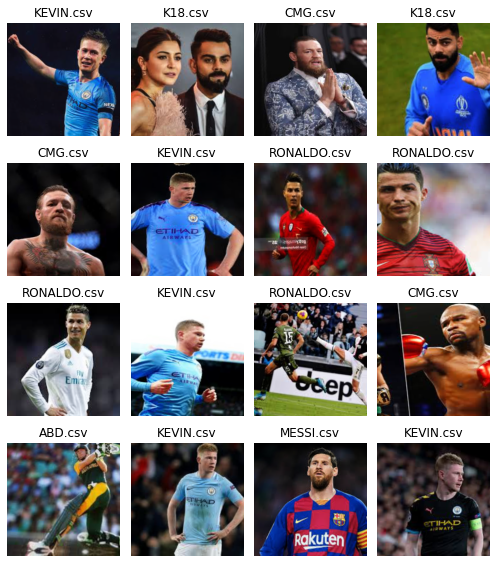

In [31]:
data.show_batch(rows=4, figsize=(7,8))

In [32]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['ABD.csv',
  'CMG.csv',
  'CURRY.csv',
  'K18.csv',
  'KEVIN.csv',
  'MESSI.csv',
  'PEP.csv',
  'RONALDO.csv',
  'players'],
 9,
 1061,
 265)

In [33]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [34]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.819171,0.830526,0.230189,00:17
1,1.757694,0.688110,0.154717,00:16
2,1.282297,0.631638,0.158491,00:16
3,1.029244,0.612403,0.162264,00:15


In [35]:
learn.save('stage-1')

In [36]:
learn.unfreeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

In [ ]:
learn.save('stage-2')

In [ ]:
learn.load('stage-2');

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)


In [ ]:
interp.plot_confusion_matrix()

In [ ]:
from fastai.widgets import *

In [ ]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [ ]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [ ]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [ ]:
ImageCleaner(ds, idxs, path)

In [ ]:
ds, idxs = DatasetFormatter().from_similars(learn_cln)

In [ ]:
ImageCleaner(ds, idxs, path, duplicates=True)

In [ ]:
learn.export()

In [ ]:
defaults.device = torch.device('cpu')

In [ ]:
img = open_image(path/'qwerty.jpg')
img

In [ ]:
learn = load_learner(path)

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class.obj